In [4]:
#필요 모듈 호출
import numpy as np #행렬 연산 패키지
from scipy import stats #과학 계산 패키지
import scipy.stats #통계 분석 패키지
import pandas as pd #데이터 패키지
import statsmodels.api as sm #통계 분석 패키지
import matplotlib.pyplot as plt #데이터 시각화 패키지
import seaborn as sns #데이터 시각화 패키지
from statsmodels.stats.proportion import proportions_ztest
import matplotlib

#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

In [36]:
#p.25 [실습] 기술통계 -1
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python") #파일 불러오기
ds_mycars.head() #파일 제대로 불려 왔는지 확인
df = ds_mycars[['automatic','mpg']] #표의 x축과 기준을 구동방식과 연비로 설정
df.groupby('automatic').describe().round(3) #표의 y축을 구동방식으로 설정

#파이썬을 이용하여 쉽고 간편하게 평균, 중앙 값, 데이터 수등 다양한 정보를 구할 수 있었다.
#파일을 불러와서 원하는대로 가공하는 법에 대해서 익힐 수 있었다.

mpg                                            
           count    mean    std  min   25%   50%   75%   max
automatic                                                   
auto       157.0  15.968  3.849  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675  4.488  9.0  15.0  18.0  21.0  35.0

In [10]:
#p.25 [실습] 기술통계 -2
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python") #파일 불러오기
ds_mycars.head() #파일 제대로 불려 왔는지 확인
df = ds_mycars[['highway_mileage','mpg']] #표의 x축과 기준을 고속도로와 연비로 설정
df.groupby('highway_mileage').describe().round(3) #표의 y축을 고속도로로 설정

#파이썬을 이용하여 쉽고 간편하게 평균, 중앙 값, 데이터 수등 다양한 정보를 구할 수 있었다.
#파일을 불러와서 원하는대로 가공하는 법에 대해서 익힐 수 있었다.

mpg                                               
                count    mean    std   min    25%   50%    75%   max
highway_mileage                                                     
12                5.0   9.000  0.000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000  0.000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857  0.900  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161  1.186  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800  1.033  12.0  12.00  12.5  13.00  15.0
19               13.0  14.077  0.862  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000  0.894  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000  0.000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857  0.900  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000  1.000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692  0.947  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333  1.676  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000  1.191  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214  1.188  17.0  18.25  19.0  20.00  21.0
28                7.0  19.286  0.756  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636  1.293  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000  1.414  21.0  21.00  21.5  22.50  24.0
31                7.0  21.286  0.951  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000  0.816  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000  2.828  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000    NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000  0.000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500  0.707  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000    NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000    NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000  1.414  33.0  33.50  34.0  34.50  35.0

In [17]:
#p.28 [실습] 기술통계
ds_mycars = pd.read_csv("/home/pirl/Downloads/mycars.csv", engine = "python") #데이터 가져오기
df = ds_mycars[['model','mpg']] #데이터중 모델과 연비를 가져옴

count = df['model'].value_counts().sort_index() #모델을 기준으로 순서대로 정렬
cumcnt = np.cumsum(count) #cunsum 계산
percent = count / sum(count) * 100 #percent계산
cumpct = np.cumsum(percent) #cumpct 계산

count_data = pd.DataFrame({'Count': count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct}) #DataFrame으로 취합
count_data.columns.name = 'model' #열 이름 생성
count_data #결과 출력

#파이썬의 다양한 함수를 이용하여 counts, percents, cumulative counts, cumulative counts와 같은 정보들을 손쉽게 구할 수 있었다.
#열에 이름을 추가하여 한눈에 파악하기 편한 표를 만드는 법에 대해서 익혔다.

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


In [38]:
#p.105 [실습] 정규성 검정
ds_camshaft = pd.read_csv("/home/pirl/Downloads/2sample_t_test.csv", engine = "python") #csv 파일 호출
ds_camshaft.head() #파일 정상 출력 확인

data1 = ds_camshaft['Mat_A']
data2 = ds_camshaft['Mat_B']
print(shapiro(data1))
print(shapiro(data2))
#두 가지 경우 전부 p값이 0.05이상이 나왔다.
#두 가지 경우 모두 정규분포를 따른다는 것을 알 수 있다.

(nan, 1.0)
(nan, 1.0)


In [12]:
#p.108 [실습] 모평균 구간추정_모표준편차를 아는 경우
df = pd.DataFrame({"sample":[18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
#데이터를 직접 df에 넣는다.
df.head()
#입력한 데이터의 헤드부분을 출력하여 정상 출력되는지 확인한다.
lower,upper = stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
#95%의 신뢰수준, 평균값, 3.8의 모표준편차/루트n을 인자로 넣는다.
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))
#신뢰수준 95%에서 모평균이 존재할 수 있는 범위가 17.83에서 21.17 사이이다.
#모표준편차가 주어져서 따로 계산할 필요가 없어서 과제 수행이 용이했다.

신뢰구간: ([17.83],[21.17])


In [13]:
#p.111 [실습] 모평균 추정_모표준편차를 모르는 경우
df = pd.DataFrame({"sample":[73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
#데이터를 직접 df에 넣는다.
lower,upper = stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
#95%의 신뢰수준, n-1, 평균, 모표준편차/루트n을 인자로 넣는다.
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))
#신뢰수준 95%에서 모평균이 존재할 수 있는 범위가 70.6에서 72.4 사이이다.
#모표준편차가 주어지지 않아서 모표준편차를 따로 계산할 필요가 있어서 과제 수행이 보다 복잡했다.

신뢰구간:([70.6],[72.4])


p.114 [실습]모분산 신뢰구간 추정

분산의 점추정량은 (Xi-평균)^2/n-1 이다.(s^2)
이를 계산해보면 대략, 15.84가 나온다.
n =50, s=3.98(15.84의 루트), X(카이)^2(0.025,49)=71.42, X^2(0.975,49)(카이스퀘어표에 의거 근사값)이다.
이를 공식에 대입하면 대략 10~24 정도의 신뢰구간을 얻을 수 있다.

p.118 [실습]모비율 신뢰구간 추정

비율의 점추정량은 실패 확률/전체 건수 = 9/50 = 0.18이다.(^p)
^p=0.18, n=50이며, Z(0.05/2)=1.96이다. (Z분포표에 의거)
이를 공식에 대입하면 대략 0.073~0.286 정도의 신뢰구간을 얻을 수 있다.

In [19]:
#p.140 [실습] 평균 검정(모집단 표준편차를 모르는 경우)
df = pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
t_result = stats.ttest_1samp(df,78.0)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))
#귀무가설: 개선활동이 만족도를 변화시키지 않았다.
#대립가설: 개선활동이 만족도를 변화시켰다.
#유의수준 5%에서 검정 결과 P값이 0.008이므로 개선활동이 만족도를 변화시켰다고 볼 수 있다.
#즉, 개선활동을 채택했다.

1-Sample t-test
t 통계량: [3.379]
p-value: [0.008]


2-Sample t-test
t:[1.7]
p:[0.111]


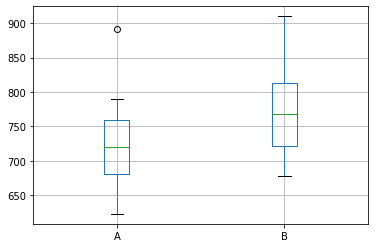

In [32]:
#p.148 [실습] Sample t-test
df1 = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]}) #A 공급자
df2 = pd.DataFrame({'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]}) #B 공급자
df.boxplot(['A','B']) #그래프 그리기
plot_data = (df1, df2) #그래프 그리기

t_result = stats.ttest_ind(df1, df2) #Sample t-test 시행
t, p = t_result.statistic.round(3), t_result.pvalue.round(3) #시행값 저장

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

#그래프 그리기를 통해서, 데이터의 형태를 한눈으로 들여다 볼 수 있었다.
#귀무가설: 공급자 간에 모평균에 차이가 없다.
#대립가설: 공급자 간에 모평균에 차이가 있다.
#유의수준 5%에서 검정 결과 P값이 0.111이므로 공급자가 간에 모평균에 차이가 없다고 볼 수 있다.
#즉, 귀무가설을 채택했다.


In [7]:
#p.151 [실습] Paired t-test
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]}) #before 데이터 생성
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})  #after 데이터 생성

t_result = stats.ttest_rel(df1,df2) #Paired t-test 수행
t,p = t_result.statistic.round(3), t_result.pvalue.round(4) #결과 값 저장

print("Paired t-test") #출력
print("t:{}".format(t))
print("p:{}".format(p))

#귀무가설: 성적이 학원을 가기전과 차이가 없다.
#대립가설: 성적이 학원을 가기전과 차이가 있다.
#p값이 0.05이므로 p<=0.05는 성립한다. 
#따라서, 성적이 학원을 가기전과 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

Paired t-test
t:[-2.266]
p:[0.0497]


In [8]:
#p. 157 [실습] 1 Proportion test
count = 40 #앞면이 40번 나옴
n_obs = 100 #100번 던짐
value = 0.5 #앞면이 나올 확률

stat, pval = proportions_ztest(count, n_obs, value)

print("2 Proprotion test") #출력
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

#귀무가설: 동전을 던졌을 때 앞면이 나올 것이다.
#대립가설: 동전을 던졌을 때 앞면이 나오지 않을 것이다.
#p값이 0.0041이므로 p<=0.05는 성립한다. 
#따라서, 동전을 던졌을 때 앞면이 나오지 않을 것이다.
#즉, 대립가설을 채택했다.

2 Proprotion test
z: -2.041
p:0.041


In [40]:
#p.160 [실습] 2 Proportion test
count = np.array([14,5]) #공장 A와 B의 불량품 갯수를 저장
nobs = np.array([1200,1200]) #공장 A와 B의 생산 갯수를 저장
#즉, 공장A는 1200개중 불량품이 14개, 공장B는 1200개중 불량품이 5개라는 뜻이다.

stat, pval = proportions_ztest(count, nobs) #Proportion test 실행

print("2 Proprotion test") #출력
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

#귀무가설: 두 공정의 불량률에 차이가 없다.
#대립가설: 두 공정의 불량률에 차이가 있다.
#p값이 0.038이므로 p<0.05는 성립한다.
#즉, 두 공정의 불량률에 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

2 Proprotion test
z: 2.073
p:0.038


In [41]:
#p168 [실습] 카이제곱 검정
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
#데이터 입력
chi,pval,dof,expected = stats.chi2_contingency(df.T) #chi-squre test실행

print("chi-squre test") #결과 출력
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))

#귀무가설: 각 제품에 대한 이미지에 대해 차이가 없다.
#대립가설: 각 제품에 대한 이미지에 대해 차이가 있다.
#p값이 0이므로 p<0.05는 성립한다.
#즉, 각 제품에 대한 이미지에 대해 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.

chi-squre test
chisq: 98.274
p: 0.000
degree pf freedom: 30


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


One-way
F통계량:4.172
p-value:0.019


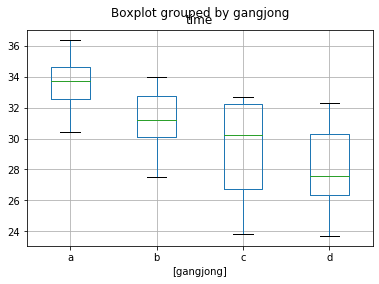

In [2]:
#p.176 [실습] One way ANOVA
ds_anova = pd.read_csv("/home/pirl/Downloads/ANOVA.csv", engine = "python") #데이터를 불러옴
df = ds_anova[['time','gangjong']]
df.boxplot(by = 'gangjong') #그래프 그리기(x축은 강종, y축은 시간을 갖음)

a = df['time'][df.gangjong=='a'] # a강종의 시간을 변수 a에 저장
b = df['time'][df.gangjong=='b'] # b강종의 시간을 변수 a에 저장
c = df['time'][df.gangjong=='c'] # c강종의 시간을 변수 a에 저장
d = df['time'][df.gangjong=='d'] # d강종의 시간을 변수 a에 저장

f_result = stats.f_oneway(a, b, c, d) #ANOVA 실행
f, p = f_result.statistic.round(3), f_result.pvalue.round(3) #결과값 저장
print("One-way") #출력
print("F통계량:{}".format(f))
print("p-value:{}".format(p))

#귀무가설: 강종별 2차정련 시간에 차이가 없다.
#대립가설: 강종별 2차정련 시간에 차이가 있다.
#p값이 0.019이므로 p<0.05는 성립한다.
#즉, 강종별 2차정련 시간에는 차이가 있다고 볼 수 있다.
#즉, 대립가설을 채택했다.